## Import libraries

In [58]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
import xgboost, catboost, lightgbm

## Import data

In [3]:
data = pd.read_csv("./sales_prediction/Advertising.csv", index_col = [0])
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


## EDA

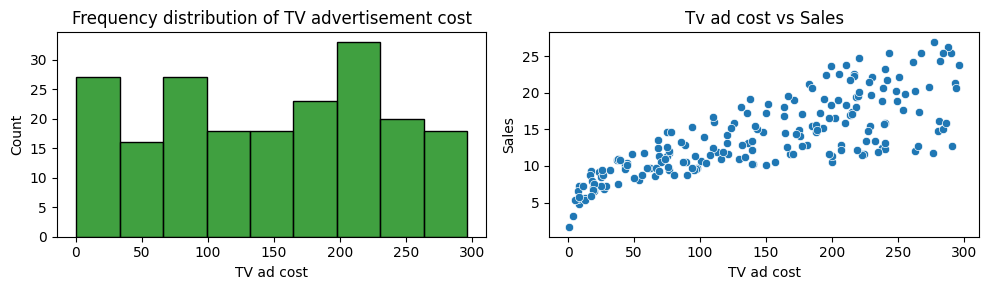

In [33]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.histplot(x = "TV", data = data, color = 'green')
plt.title("Frequency distribution of TV advertisement cost");
plt.xlabel('TV ad cost');

plt.subplot(1, 2, 2)
sns.scatterplot(x = 'TV', y = 'Sales', data = data)
plt.xlabel('TV ad cost');
plt.title("Tv ad cost vs Sales");
plt.tight_layout()

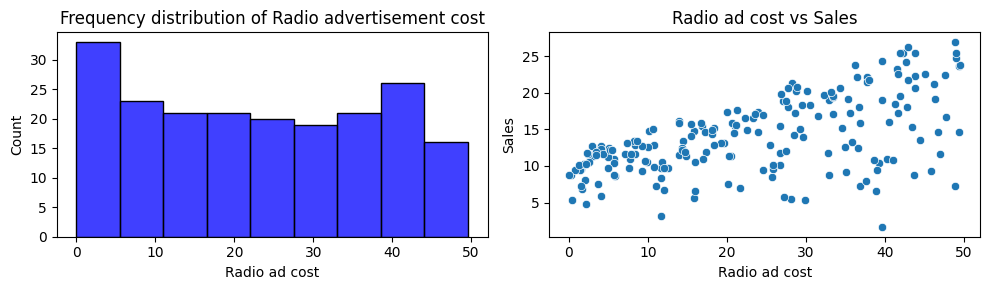

In [32]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.histplot(x = "Radio", data = data, color = 'blue')
plt.title("Frequency distribution of Radio advertisement cost");
plt.xlabel('Radio ad cost');

plt.subplot(1, 2, 2)
sns.scatterplot(x = 'Radio', y = 'Sales', data = data)
plt.xlabel('Radio ad cost');
plt.title("Radio ad cost vs Sales");
plt.tight_layout()

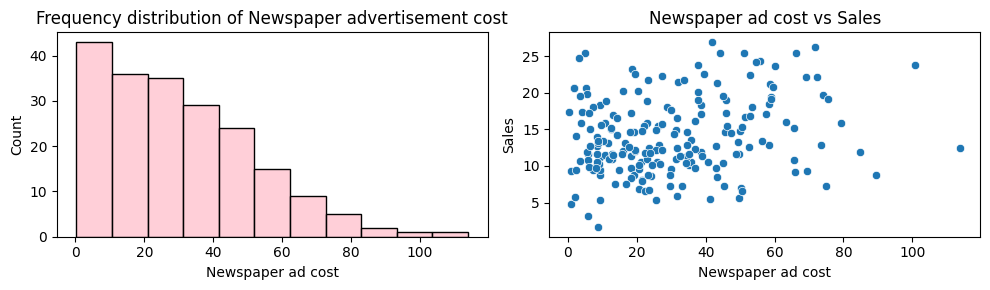

In [31]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.histplot(x = "Newspaper", data = data, color = 'pink')
plt.title("Frequency distribution of Newspaper advertisement cost");
plt.xlabel('Newspaper ad cost');

plt.subplot(1, 2, 2)
sns.scatterplot(x = 'Newspaper', y = 'Sales', data = data)
plt.xlabel('Newspaper ad cost');
plt.title("Newspaper ad cost vs Sales");
plt.tight_layout()

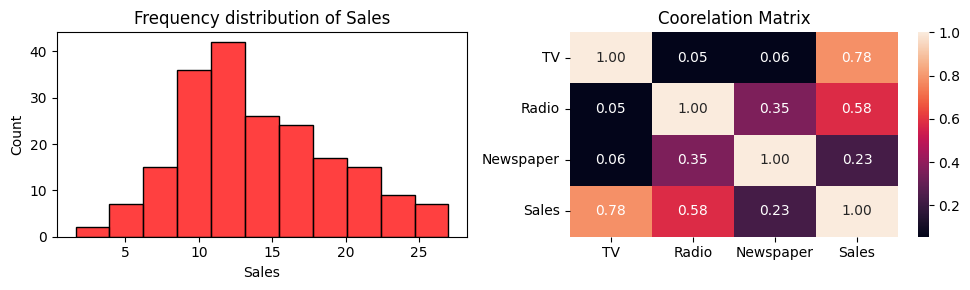

In [30]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.histplot(x = "Sales", data = data, color = 'red')
plt.title("Frequency distribution of Sales");
plt.xlabel('Sales');

plt.subplot(1, 2, 2)
sns.heatmap(data.corr(), annot = True, fmt = '.2f')
plt.title("Coorelation Matrix")
plt.tight_layout()

## Train test split

In [37]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Modelling Experiment

In [67]:
def model_performance(model, X_train, X_test, y_train, y_test):
    cross_val_res = cross_validate(model, X_train, y_train, cv = 5, return_train_score = True, n_jobs = -1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    return{
        'r2_score': np.round(r2_score(y_test, y_pred), 2),
        'mae': np.round(mean_absolute_error(y_test, y_pred), 2),
        'mse': np.round(mean_squared_error(y_test, y_pred), 2),
        'rmse': np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 2),
        'mean_train_cross_val_score': np.round(np.mean(cross_val_res["train_score"]), 2),
        'mean_test_cross_val_score': np.round(np.mean(cross_val_res["test_score"]), 2),

    }

### Model1: Linear Regression

In [40]:
lin_reg = LinearRegression()
model_performance(lin_reg, X_train, X_test, y_train, y_test)

{'r2_score': 0.89,
 'mae': 1.04,
 'mse': 1.99,
 'rmse': 1.41,
 'mean_train_cross_val_score': 0.9,
 'mean_test_cross_val_score': 0.89}

### Model2: Decision Tree

In [42]:
dtree = DecisionTreeRegressor(random_state = 42)
model_performance(dtree, X_train, X_test, y_train, y_test)

{'r2_score': 0.97,
 'mae': 0.62,
 'mse': 0.62,
 'rmse': 0.79,
 'mean_train_cross_val_score': 1.0,
 'mean_test_cross_val_score': 0.94}

### Model3: Random Forest

In [43]:
rdf = RandomForestRegressor(random_state = 42)
model_performance(rdf, X_train, X_test, y_train, y_test)

{'r2_score': 0.97,
 'mae': 0.55,
 'mse': 0.48,
 'rmse': 0.69,
 'mean_train_cross_val_score': 1.0,
 'mean_test_cross_val_score': 0.97}

### Model4: SVM ('linear' kernel)

In [44]:
svr = SVR(kernel = 'linear')
model_performance(svr, X_train, X_test, y_train, y_test)

{'r2_score': 0.9,
 'mae': 1.02,
 'mse': 1.91,
 'rmse': 1.38,
 'mean_train_cross_val_score': 0.89,
 'mean_test_cross_val_score': 0.88}

### Model5: SVR ('polynomial' kernel)

In [48]:
svr = SVR(kernel = 'poly')
model_performance(svr, X_train, X_test, y_train, y_test)

{'r2_score': 0.91,
 'mae': 0.93,
 'mse': 1.69,
 'rmse': 1.3,
 'mean_train_cross_val_score': 0.84,
 'mean_test_cross_val_score': 0.83}

### Model6: Gradient Boosting

In [55]:
gbr = GradientBoostingRegressor(random_state = 1)
model_performance(gbr, X_train, X_test, y_train, y_test)

{'r2_score': 0.98,
 'mae': 0.56,
 'mse': 0.46,
 'rmse': 0.68,
 'mean_train_cross_val_score': 1.0,
 'mean_test_cross_val_score': 0.98}

### Model7: XGBoost

In [57]:
xgb = xgboost.XGBRegressor()
model_performance(xgb, X_train, X_test, y_train, y_test)

{'r2_score': 0.97,
 'mae': 0.54,
 'mse': 0.53,
 'rmse': 0.72,
 'mean_train_cross_val_score': 1.0,
 'mean_test_cross_val_score': 0.97}

### Model8: LightGBM

In [60]:
lgbm = lightgbm.LGBMRegressor(n_jobs = -1)
model_performance(lgbm, X_train, X_test, y_train, y_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000397 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 159
[LightGBM] [Info] Number of data points in the train set: 160, number of used features: 3
[LightGBM] [Info] Start training from score 13.811250
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

{'r2_score': 0.96,
 'mae': 0.62,
 'mse': 0.83,
 'rmse': 0.91,
 'mean_train_cross_val_score': 0.98,
 'mean_test_cross_val_score': 0.94}

### Model9: CatBoost

In [68]:
ctb = catboost.CatBoostRegressor(verbose = 0)
model_performance(ctb, X_train, X_test, y_train, y_test)

{'r2_score': 0.99,
 'mae': 0.31,
 'mse': 0.13,
 'rmse': 0.36,
 'mean_train_cross_val_score': 1.0,
 'mean_test_cross_val_score': 0.98}

### **CatBoost** outperforms all other models with an excellent R2 score of `0.99`

In [112]:
y_pred = ctb.predict(X_test)

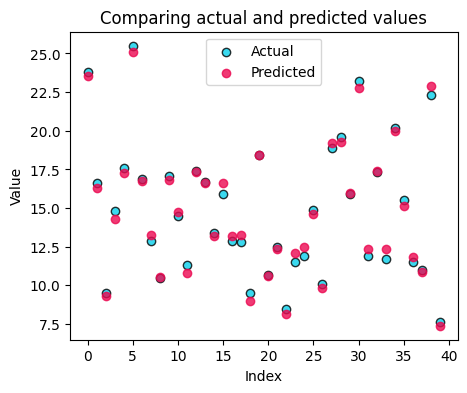

In [114]:
plt.figure(figsize = (5, 4))
plt.scatter(np.arange(len(y_test)), y_test, alpha = 0.8, color = '#09d0eb', edgecolors=['black'], label = 'Actual')
plt.scatter(np.arange(len(y_pred)), y_pred, alpha=0.8, color = '#eb0951', label = 'Predicted')
plt.legend()
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Comparing actual and predicted values");